# Thera Bank Personal Loan Campaign
 
## Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

## Domain:
Banking

 

## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

 

## Attribute Information:
ID: Customer ID

Age: Customer's age in completed years

Experience: #years of professional experience

Income: Annual income of the customer ($000)

ZIP Code: Home Address ZIP

Family: Family size of the customer

CCAvg: Avg. spending on credit cards per month ($000)

Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage: Value of house mortgage if any. ($000)

Personal Loan: Did this customer accept the personal loan offered in the last campaign?

Securities Account: Does the customer have a securities account with the bank?

CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Does the customer use internet banking facilities?

Credit card: Does the customer use a credit card issued by the bank?

 
 
## Learning Outcomes:
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
 

## Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

 
## Steps and tasks:
1) Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

2) EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

    Number of unique in each column?

    Number of people with zero mortgage?

    Number of people with zero credit card spending per month?

    Value counts of all categorical columns.

    Univariate and Bivariate

    Get data model ready


3) Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

4) Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

5) Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

6) Give conclusion related to the Business understanding of your model? (5 marks)

# 1) Import the datasets and libraries

In [1]:
#import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

#import specific functions from sklearn
from sklearn.model_selection import train_test_split

In [2]:
#import dataset as df and view header
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
#view data properties and check for null values
print(df.info())
print('')
print('The shape of the data is', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None

The shape of the data is (5000, 14)


In [4]:
#view null values
print(df.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [5]:
#describe the data, look for inconsistencies or outliers in the summary 
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
# Experience column has negative values, which is illogical. Remove negative numbers from Experience column and replace w/ 0
df['Experience'].clip(lower = 0, inplace = True)
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# 2) EDA: Study the data distribution in each attribute and target variable, share your findings

Number of unique in each column?

Number of people with zero mortgage?

Number of people with zero credit card spending per month?

Value counts of all categorical columns.

Univariate and Bivariate

Get data model ready

In [7]:
# find number of unique values per category
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
# find number of people with 0 mortgage
print('The number of people with no mortage is', sum(df['Mortgage'] == 0))

The number of people with no mortage is 3462


In [9]:
print('The number of people with zero credit card spending is', sum(df['CCAvg']==0))

The number of people with zero credit card spending is 106


In [10]:
#value counts on categorical columns - education, personal loan, securities account, CD account, online, credit card

#create list of categorical columns
category_list = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

#loop through category list and count the values of the categories
for i in category_list:
    print(i)
    print(df[i].value_counts().sort_index())

Education
1    2096
2    1403
3    1501
Name: Education, dtype: int64
Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64
Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64
CD Account
0    4698
1     302
Name: CD Account, dtype: int64
Online
0    2016
1    2984
Name: Online, dtype: int64
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64


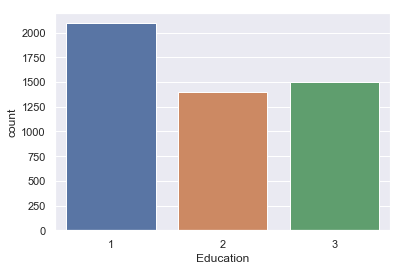

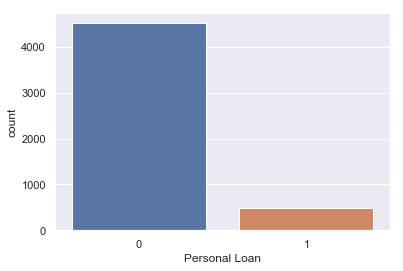

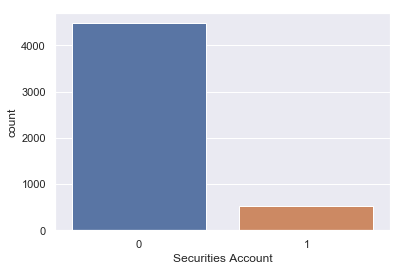

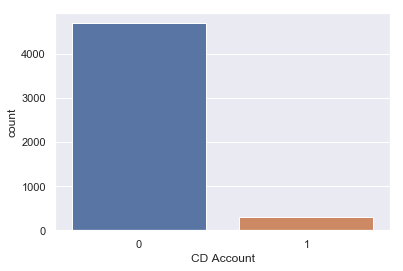

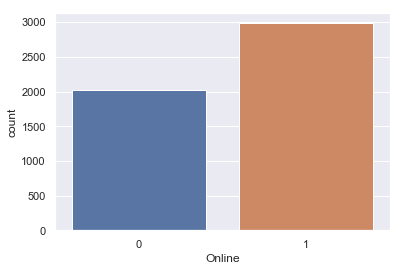

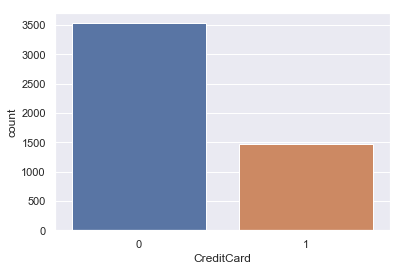

In [11]:
#visualize categorical values using plots

for i in category_list:
    sns.countplot(df[i])
    plt.show()

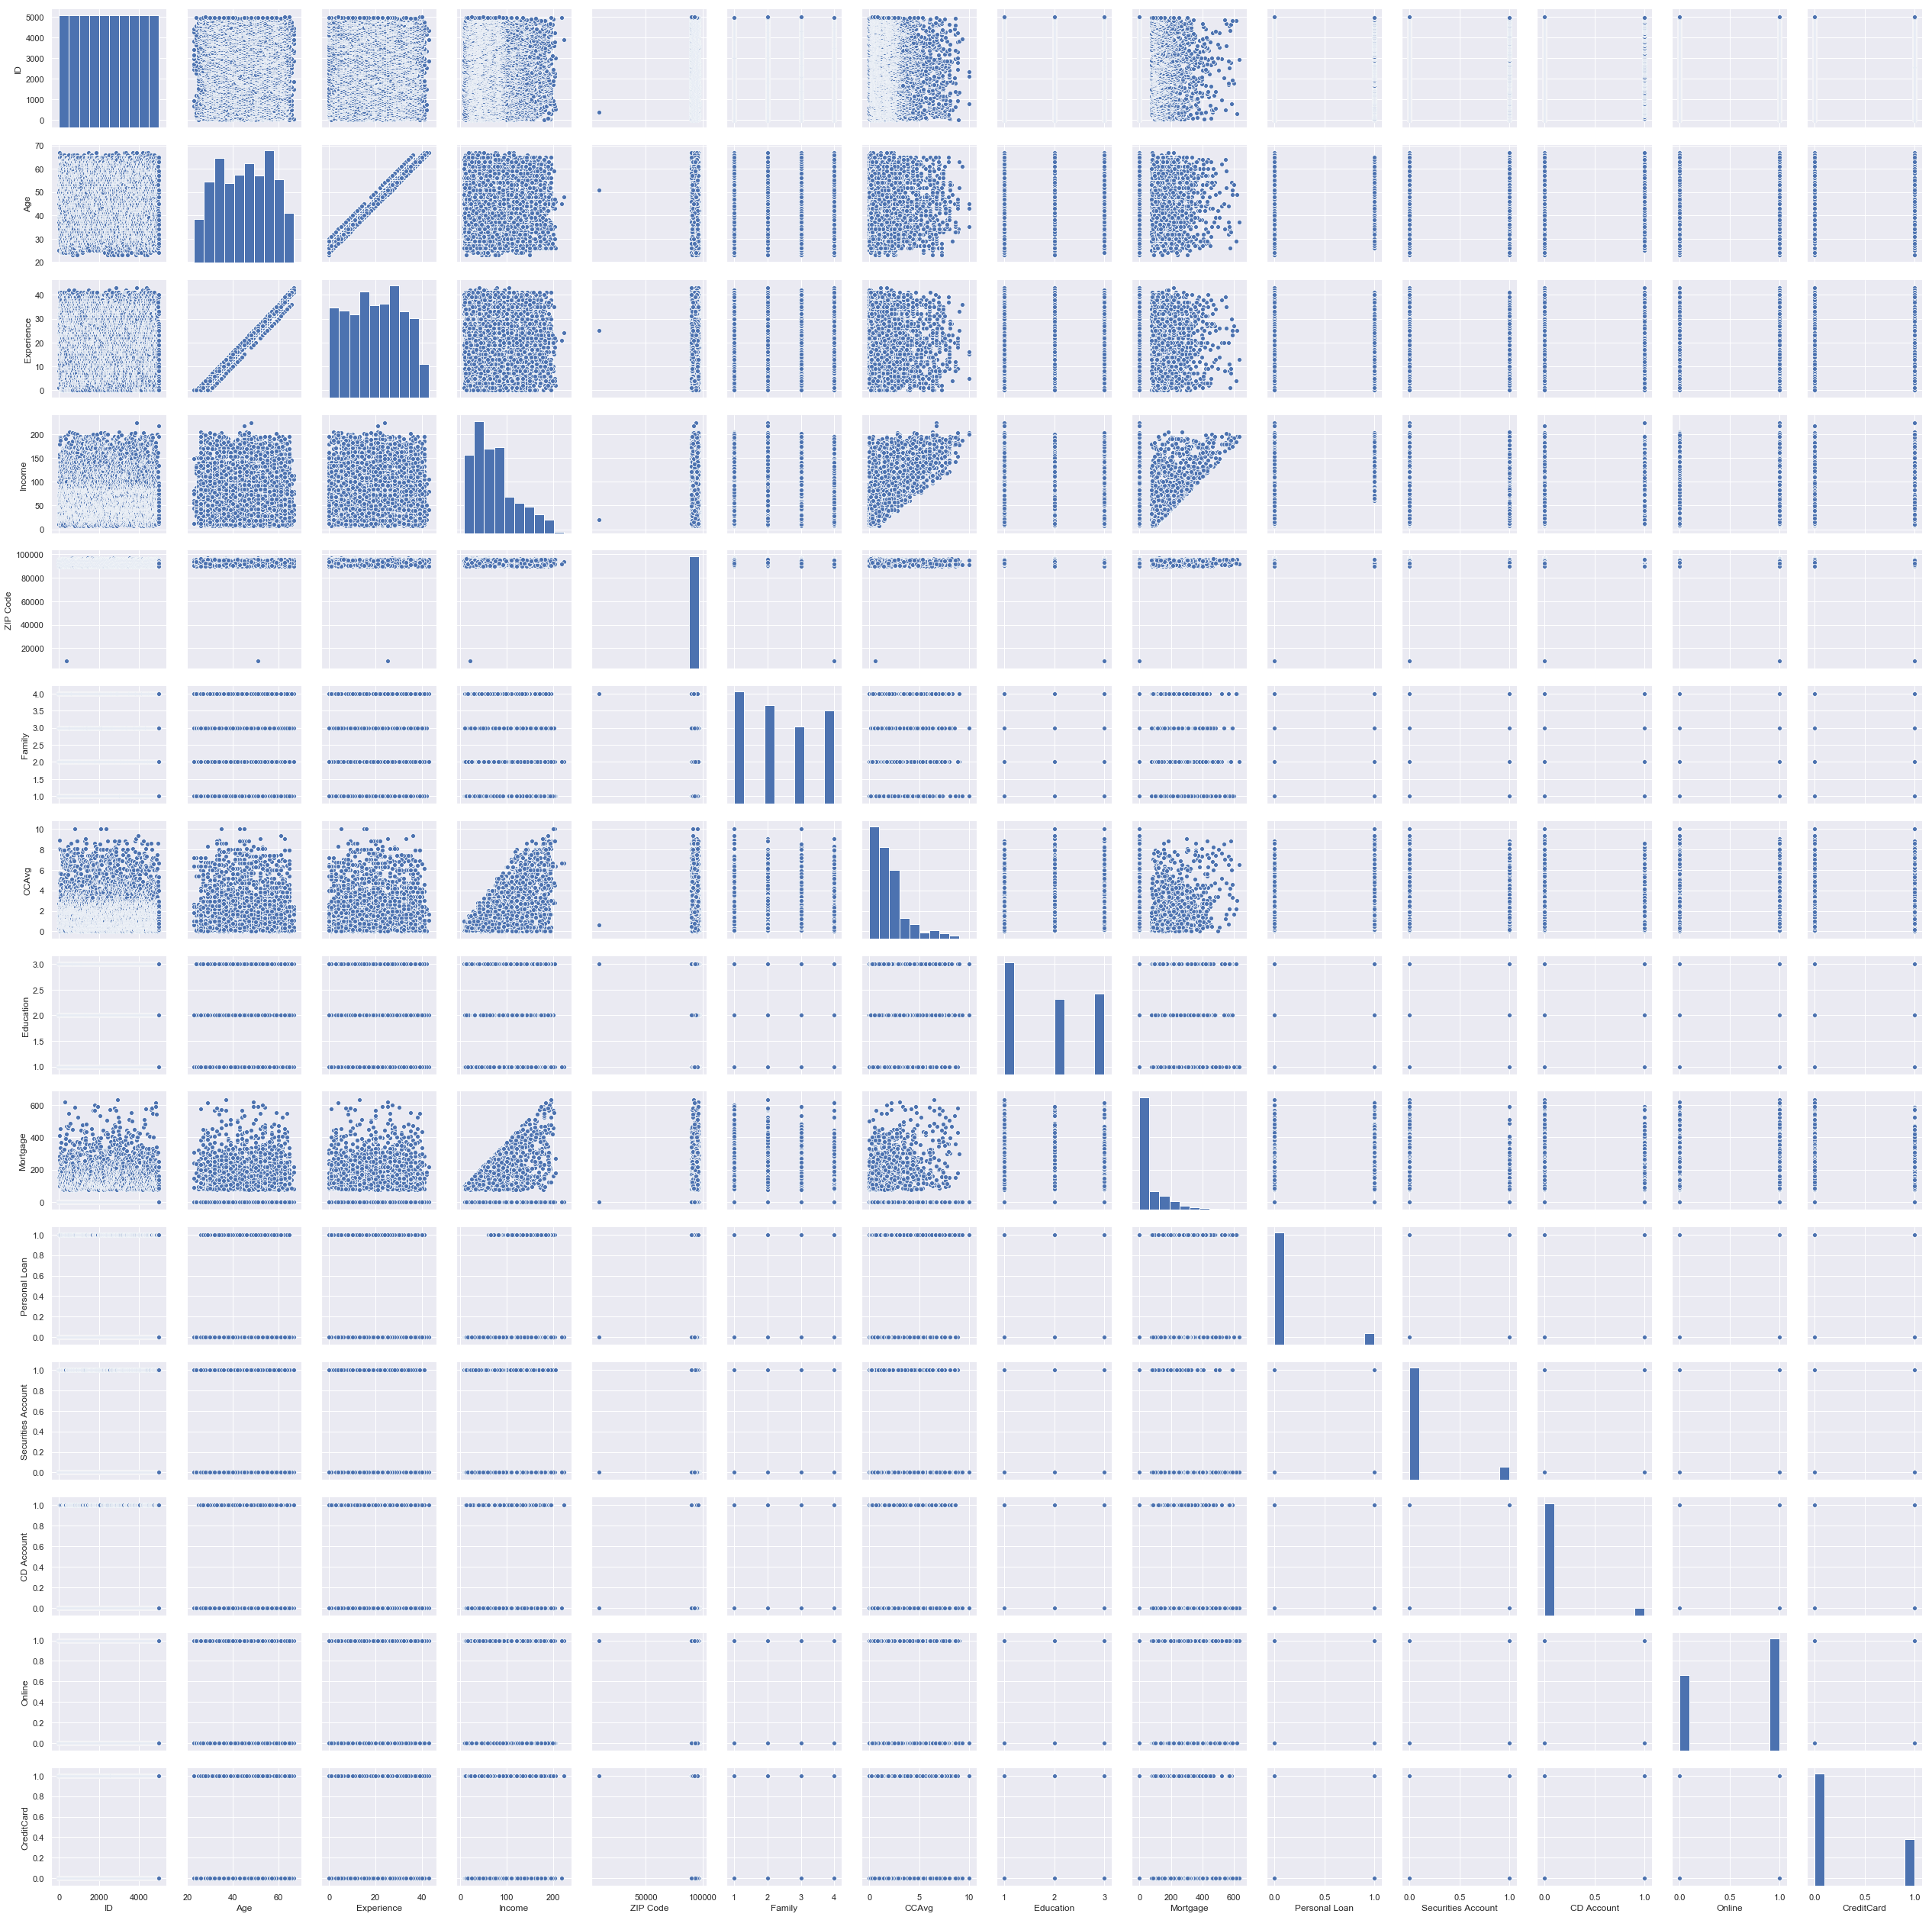

In [12]:
#use pairplot to show summary of univariate and bivariate plots
sns.pairplot(df)
plt.show()

# 3) Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

"Personal Loan" category will be the independent variable, and can be typecast as a categorical variable



In [13]:
# split the data into dependent (y) and independent variables (X)

y = df['Personal Loan']
X = df.drop(columns = {'Personal Loan'}).astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [14]:
# check shape of test and train data to ensure proper split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 13) (1500, 13) (3500,) (1500,)


# 4) Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [15]:
# import log regression libraries
from sklearn.linear_model import LogisticRegression

#create instance of the model as lr
lr = LogisticRegression(random_state = 1)

# fit the model according to the training data
lr.fit(X_train, y_train)

C:\Users\jharnack\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
# use model to predict y values based on test data
y_predict = lr.predict(X_test)

# check to see how many "true" values the model returned relative to its size
print(100 * y_predict.sum() / y_predict.size,'%')

5.0 %


In [17]:
# import functions and libraries for metrics and statistics

import sklearn.metrics as skmet
import statsmodels.api as sm

In [18]:
# use sklearn metric functions to calculate accuracy, recall, precision and round to 2 decimal places

print('The accuracy of the model is', skmet.accuracy_score(y_test, y_predict,).round(2))
print('The recall of the model is', skmet.recall_score(y_test, y_predict).round(2))
print('The precision of the model is', skmet.precision_score(y_test, y_predict).round(2))
print('The f1 score of the model is', skmet.f1_score(y_test, y_predict).round(2))
print('The roc_auc_score is', skmet.roc_auc_score(y_test, y_predict).round(2))

The accuracy of the model is 0.91
The recall of the model is 0.29
The precision of the model is 0.57
The f1 score of the model is 0.38
The roc_auc_score is 0.63


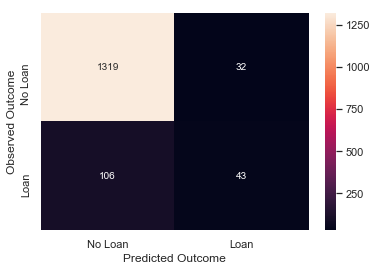

In [19]:
# calculate values for confusion matrix and set as cm array
cm = skmet.confusion_matrix(y_test, y_predict)

# plot cm using heatmap from seaborn
sns.heatmap(cm, annot = True, xticklabels = ['No Loan', 'Loan'], yticklabels = ['No Loan', 'Loan'], fmt = 'g')
plt.xlabel('Predicted Outcome')
plt.ylabel('Observed Outcome')
plt.show()

# 5) Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [20]:
# check output of coefficient data
print(lr.coef_)

# create new dataframe with coefficient data and columns from X
coeff_data = pd.DataFrame()
coeff_data['Variable'] = X.columns
coeff_data['Coefficient'] = lr.coef_[0]
coeff_data

[[-3.65174991e-05 -5.52934135e-04 -1.55562914e-03  3.61016912e-02
  -6.44802138e-05  8.58930008e-03  5.78052454e-03  9.33823522e-03
   8.59691496e-04  3.02788098e-04  2.69120526e-03 -9.23230218e-05
  -3.12044795e-05]]


,Variable,Coefficient
0,ID,-0.000037
1,Age,-0.000553
2,Experience,-0.001556
3,Income,0.036102
4,ZIP Code,-0.000064
5,Family,0.008589
6,CCAvg,0.005781
7,Education,0.009338
8,Mortgage,0.000860
9,Securities Account,0.000303


In [21]:
# create new dataframe to host full test data + predicted outcomes
full_df = X_test.copy()

# add back the observed outcomes from test data in a column called "Personal Loan"
full_df['Personal Loan'] = y_test
full_df.reset_index(inplace = True)

# create series from prediction data and add to dataframe as "Predicted Loan"
a = pd.Series(y_predict)
full_df['Predicted Loan'] = a
full_df

,index,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,Predicted Loan
0,2764,2765,31,5,84,91320,1,2.90,3,105,0,0,0,1,0,0
1,4767,4768,35,9,45,90639,3,0.90,1,101,1,0,0,0,0,0
2,3814,3815,34,9,35,94304,3,1.30,1,0,0,0,0,0,0,0
3,3499,3500,49,23,114,94550,1,0.30,1,286,0,0,1,0,0,0
4,2735,2736,36,12,70,92131,3,2.60,2,165,0,0,1,0,0,0
5,3922,3923,31,4,20,95616,4,1.50,2,0,0,0,1,0,0,0
6,2701,2702,50,26,55,94305,1,1.60,2,0,0,0,1,0,0,0
7,1179,1180,36,11,98,90291,3,1.20,3,0,1,0,0,1,0,0
8,932,933,51,27,112,94720,3,1.80,2,0,1,1,1,1,0,0
9,792,793,41,16,98,93117,1,4.00,3,0,0,0,0,1,0,0


In [22]:
#filter dataset to only rows where the personal load and predicted loan are not equal (i.e. the model incorrectly classified)
full_df[full_df['Predicted Loan'] != full_df['Personal Loan']]

,index,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,Predicted Loan
40,1513,1514,45,21,183,95211,2,1.40,1,354,0,0,0,0,0,1
44,4377,4378,33,8,145,92507,1,2.70,3,0,0,0,1,0,1,0
48,3988,3989,59,35,85,91330,1,3.40,3,0,0,1,0,1,1,0
51,3271,3272,52,27,93,90291,4,4.10,2,0,0,0,0,1,1,0
94,349,350,26,2,60,93407,2,3.00,1,132,0,0,0,0,1,0
102,927,928,65,40,95,95014,3,3.70,2,138,0,0,0,1,1,0
107,1524,1525,40,16,155,94002,4,0.10,3,0,0,1,1,1,1,0
118,1273,1274,60,35,130,95741,3,6.30,3,437,0,1,1,1,1,0
138,1626,1627,31,6,180,93108,2,6.70,1,0,0,0,0,0,0,1
147,4284,4285,38,13,173,94305,2,3.30,1,243,0,0,0,0,0,1


# 6) Give conclusion related to the Business understanding of your model? (5 marks)

The original objective was to better identify potential customers for the bank's personal loan business and target those cusdtomers through a campaign. The original campaign of 5,000 customers yielded 480 (9.6%) of those customers taking out a personal loan. By using data from the previous campaign, we can identify customers with high-probability of converting to a loan.

The above model was tested on a subset of the full data - 1,500 customers. Of those 1,500 customers, the model correctly predicted that 43 of them would take out a loan (True Positives) and 1,319 of those customers would not take out a loan (True Negatives).

The model incorrectly predicted 106 of these customers would not take out a loan (False Negatives). If these customers were not targeted in this new campaign, then the bank is missing out on business from these customers. If the cost of campaigning to these customers is low, and the bank is trying to reach as many customers as possible to expand revenue, then this number should be minimized in a new model.

The model incorrectly predicted 32 of these customers would take out a loan (False Positives). The bank would target these cusomters in the new campaign but they would not have converted to a loan (i.e. wasted marketing effort and dollars). If the cost of campaigning to these customers is low, then this number can afford to be higher by using a different model.

If the bank were to target the subset of customers predicted by this model, they would campaign to 75 customers, with 43 of them taking out a personal loan (57% conversion rate). However, they would have lost out on 106 customers who would have taken out a loan.

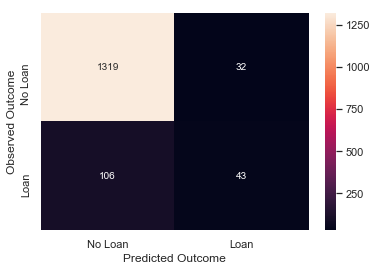

In [23]:
sns.heatmap(cm, annot = True, xticklabels = ['No Loan', 'Loan'], yticklabels = ['No Loan', 'Loan'], fmt = 'g')
plt.xlabel('Predicted Outcome')
plt.ylabel('Observed Outcome')
plt.show()